In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/ME592

/content/drive/MyDrive/Colab Notebooks/ME592


## 2.1.1 Load sudoku-original.png image in grayscale mode.

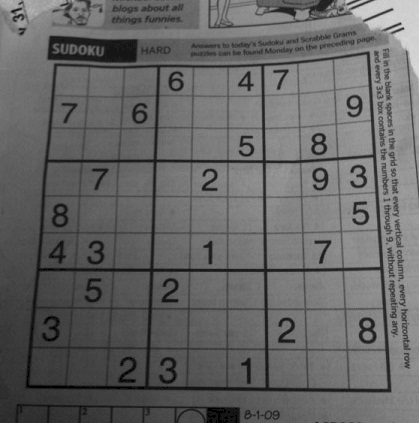

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# last argument 1 is for rgb, 0 is for grayscale
img = cv2.imread('sudoku-original.png',0)
cv2_imshow(img)

## 2.1.2 Plot the histogram of intensities.

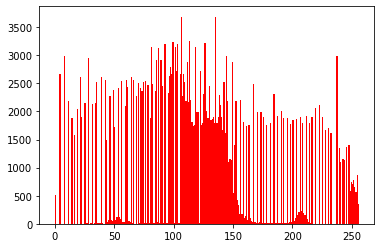

In [4]:
#Using hist
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')

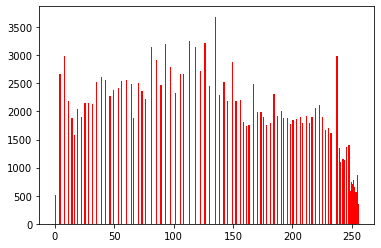

In [6]:
#Using equalizeHist 
equ = cv2.equalizeHist(img)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

## 2.1.3 Perspective Transformation to obtain proper square.

(423, 419, 3)


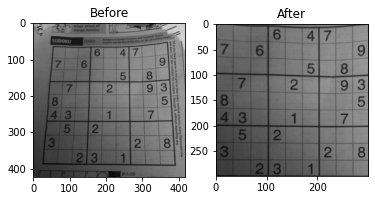

(300, 300, 3)


In [10]:
print(img.shape)
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) # 4 points picked
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)
squ = cv2.warpPerspective(img,M,(300,300)) #output image size (300,300)
squ = cv2.cvtColor(squ, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(img),plt.title('Before')
plt.subplot(122),plt.imshow(squ),plt.title('After')
plt.show()

print(squ.shape)

## 2.2.1 Plot the appliances energy consumption 

In [12]:
import pandas as pd
app_ene = pd.read_csv('energydata_complete.csv') # Load data
app_ene.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097


<Figure size 432x288 with 0 Axes>

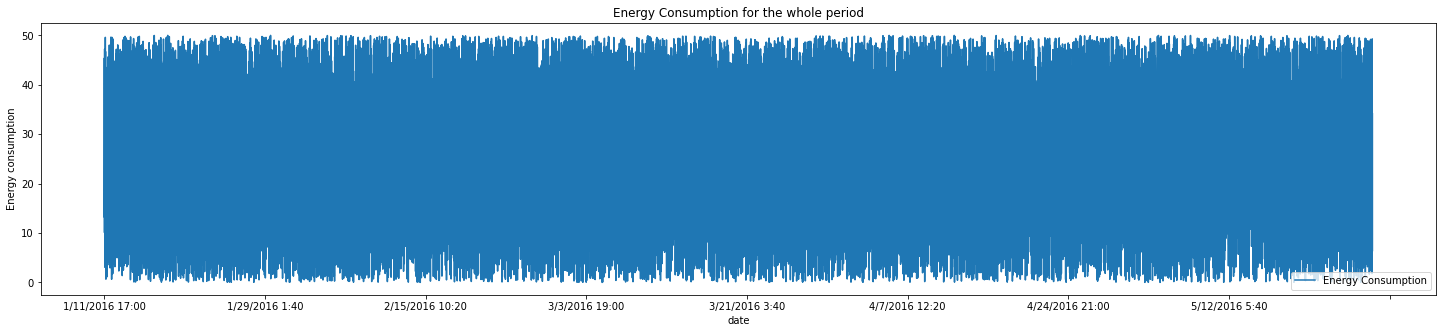

<Figure size 432x288 with 0 Axes>

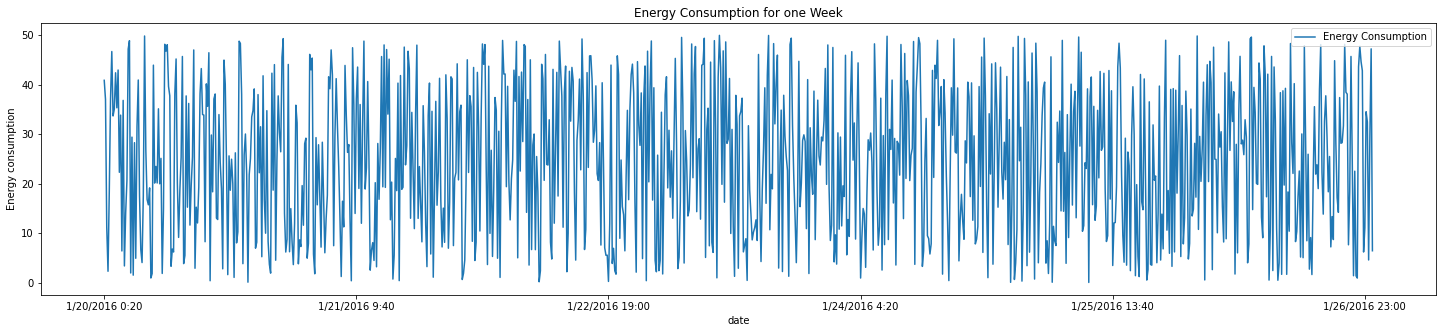

In [39]:
fig = plt.figure()
app_ene.plot(x = 'date', y = 'Energy Consumption', figsize=(25,5), title = 'Energy Consumption for the whole period', xlabel = 'date', ylabel = 'Energy consumption')

fig = plt.figure()
app_ene[1196:2203].plot(x = 'date', y = 'Energy Consumption', figsize=(25, 5), title = 'Energy Consumption for one Week', xlabel = 'date', ylabel = 'Energy consumption')

plt.show()

## 2.2.2 Plot heatmap of hourly consumption of appliances for a week.

<Figure size 432x288 with 0 Axes>

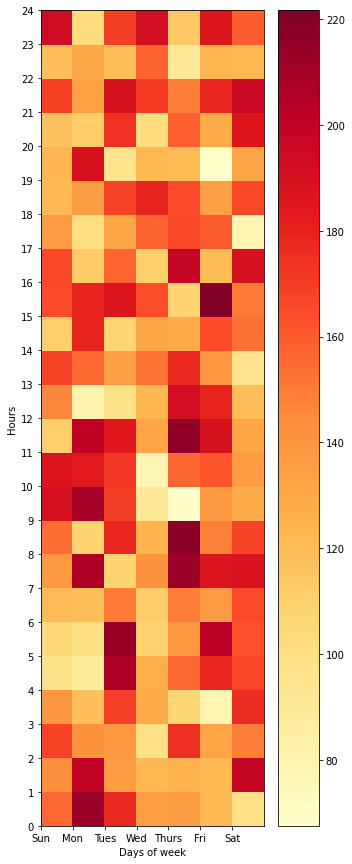

In [52]:

#app_ene.set_index('date')
Date= app_ene["date"]

td = app_ene.set_index(pd.DatetimeIndex(pd.to_datetime(Date)))
#td
_day = td.resample('H').sum()
#td_day = td.resample('W').sum()

fig = plt.figure()
Week1_= _day.loc['2016-01-20 00:00:00' : '2016-01-26 23:50:00'] # selected one week
#Week_
Week1_ = Week1_['Energy Consumption']
Week1_ = Week1_.reset_index()
Week1_['Energy Consumption']
Week1_ = np.reshape(Week1_['Energy Consumption'].values, (24,7)) # Hourly for one week

fig, ax = plt.subplots(figsize=(5, 15))
heatmap = plt.pcolor(Week1_, cmap='YlOrRd')
# axis ranges
ax.set_yticks(range(0,25))
ax.set_xticks(range(0,7))
ax.set_xticklabels(['Sun','Mon', 'Tues', 'Wed', 'Thurs','Fri', 'Sat'])

ax.set_ylabel('Hours')
ax.set_xlabel('Days of week')

plt.colorbar(heatmap)

## 2.2.3 Plot the histogram of energy consumption of appliances

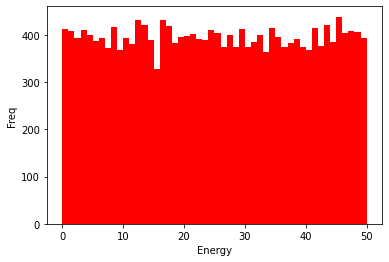

In [55]:
_ = plt.hist(app_ene['Energy Consumption'],50,[0,50], color = 'r')
plt.xlabel('Energy')
plt.ylabel('Freq')
plt.show()

## 2.2.4 Construct NSM

In [62]:
def c_NSM(date):
    time = date[-5:]
    NSM = int(time[-2:])*60 + int(time[-5:-3])*3600
    # print(NSM)
    return NSM

app_ene["NSM"] = app_ene["date"].apply(lambda x: c_NSM(x))
app_ene["NSM"]

0        61200
1        61800
2        62400
3        63000
4        63600
         ...  
19730    62400
19731    63000
19732    63600
19733    64200
19734    64800
Name: NSM, Length: 19735, dtype: int64

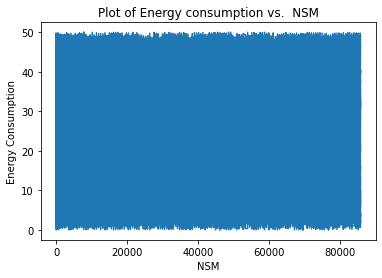

In [63]:
plt.plot(app_ene['NSM'],app_ene['Energy Consumption'])
plt.ylabel('Energy Consumption')
plt.xlabel('NSM')
plt.title("Plot of Energy consumption vs.  NSM")
plt.show()

## 2.2.5 Plot appliances energy consumption vs. Press mm Hg.

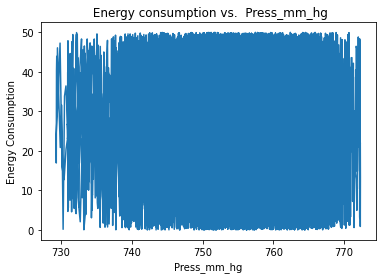

In [66]:
plt.plot(app_ene['Press_mm_hg'],app_ene['Energy Consumption'])
plt.ylabel('Energy Consumption')
plt.xlabel('Press_mm_hg')
plt.title(" Energy consumption vs.  Press_mm_hg")
plt.show()

## 2.2.6

We can see from 2.2.4 and 2.2.5, the energy consumption hardly depends on either of Press_mm_hg or NSM. Maybe this happened due to the presence of other variables that are obscuring the effect of this 2 variables on the energy consumption. So, we should do more investigation the dataset to properly categorzie it and find the dependency on energy consumption. From the heat map, however, we observe that there is an overall increase in the energy consumption around noon and also around midnight.

## 2.3 Multivariate

In [ ]:
!ls

In [73]:
df = pd.read_csv('airfoil_self_noise.dat', delimiter="\t", header= None)
df.columns = ["Freq", "Angle of attack", "chord length", "velocity", "Thickness", "Pressure level"]
df.head()

,Freq,Angle of attack,chord length,velocity,Thickness,Pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [74]:
#2.3.1
df.mean()

Freq               2886.380572
Angle of attack       6.782302
chord length          0.136548
velocity             50.860745
Thickness             0.011140
Pressure level      124.835943
dtype: float64

In [75]:
#2.3.2
df.var()

Freq               9.938717e+06
Angle of attack    3.502424e+01
chord length       8.749868e-03
velocity           2.425116e+02
Thickness          1.729287e-04
Pressure level     4.759146e+01
dtype: float64

In [76]:
#2.3.3
df.median()

Freq               1600.000000
Angle of attack       5.400000
chord length          0.101600
velocity             39.600000
Thickness             0.004957
Pressure level      125.721000
dtype: float64

In [77]:
#2.3.4
df.kurtosis()

Freq               5.708685
Angle of attack   -0.412951
chord length      -1.037964
velocity          -1.563951
Thickness          2.218903
Pressure level    -0.314187
dtype: float64

In [78]:
#2.3.5
df.skew()

Freq               2.137084
Angle of attack    0.689164
chord length       0.457457
velocity           0.235852
Thickness          1.702165
Pressure level    -0.418952
dtype: float64

In [79]:
#2.3.6
Range = df.max() - df.min()
Range

Freq               19800.000000
Angle of attack       22.200000
chord length           0.279400
velocity              39.600000
Thickness              0.058011
Pressure level        37.607000
dtype: float64